In [35]:
import timeit
import math
import matplotlib.pyplot as plt
import numpy as np
import random

# Programação Estruturada

### 1) Faça um programa iterativo e outro recursivo para fatorar um número inteiro.

In [36]:
# Objetivo: Decompor um número em fatores primos
# Números primos: Divisíveis por 1 e por ele mesmo (2, 3, 5, 7, 11, 13, 17, 19, 23, 29, ...)

"""
Iniciamos a função com uma lista vazia de fatores primos e um divisor igual a 2.
Enquanto o divisor for menor ou igual ao número, o loop continua. 
O loop veririca se o número é divisível pelo divisor atual (começando com 2)
Se for, o divisor é adicionado à lista de fatores primos e o número é dividido por ele
Se não for, o divisor é incrementado em 1 e o loop continua
"""


def fatorar_it(n):
    fatores = []
    div = 2

    while div <= n:
        if n % div == 0:
            fatores.append(div)
            n = n / div
        else:
            div += 1
    return fatores


"""
Agora, a função é recursiva.
Ela recebe um número e um divisor (que começa com 2)
Nós colocamos o divisor nas variáveis de entrada para que ele possa ser modificado em chamadas recursivas da função.
Se o número for 1, a função retorna uma lista vazia. Esse é o caso base.

Se o número for divisível pelo divisor,
A função retorna uma lista com o divisor + o resultado da função chamada com o número dividido pelo divisor.
Se o número não for divisível pelo divisor,
A função retorna a função chamada com o número e o divisor incrementado em 1.

Sabemos que no python uma operação do tipo [a] + [b] retorna uma nova lista com os elementos a e b.
Analisando atentamente o funcionamento da função, percebemos que ela retorna uma lista com todos os divisores.
"""


def fatorar_rec(n, div=2):
    if n == 1:
        return []
    elif n % div == 0:
        return [div] + fatorar_rec(n / div, div)
    else:
        return fatorar_rec(n, div + 1)

In [37]:
'''
Fatorando o número 441, temos:

441 | 3
147 | 3
49  | 7
7   | 7
1   | 1
'''

fatores_it = fatorar_it(441)
fatores_rec = fatorar_rec(441)

print(f"Decomposição de 441: {fatores_it}")
print(f"Decomposição de 441: {fatores_rec}")

Decomposição de 441: [3, 3, 7, 7]
Decomposição de 441: [3, 3, 7, 7]


### 2) Calcule a potencia de um número usando recursão. Pense numa solução eficiente.

In [38]:
"""
Essa versão é ineficiente porque usa um loop que multiplica base por si mesma expoente vezes para calcular a potência. 
Ou seja, para calcular base elevado a n, essa função faz n multiplicações. Isso resulta em uma complexidade assintótica de O(n).
"""


def potencia_iterativa_ineficiente(base, expoente):
    resultado = 1
    for _ in range(expoente):
        resultado *= base
    return resultado


"""
Essa abordagem é recursiva, mas ainda ineficiente.
Se o expoente for 0, a função retorna 1. Esse é o caso base.
Se o expoente for maior que 0, a função retorna base multiplicada pelo resultado da função chamada com base e expoente - 1.
Isso significa que ainda são feitas n multiplicações para calcular base elevado a n. Isso resulta em uma complexidade assintótica de O(n).
"""


def potencia_recursiva_ineficiente(base, expoente):
    if expoente == 0:  # caso base: qualquer número elevado a 0 é 1
        return 1
    else:
        return base * potencia_recursiva_ineficiente(base, expoente - 1)


"""
Essa abordagem é recursiva e eficiente.
Se o expoente for 0, a função retorna 1. Esse é o caso base.
Se o expoente for par, a função retorna o resultado da função chamada com base e expoente divididos por 2, elevado ao quadrado.
Se o expoente for ímpar, a função retorna base multiplicada pelo resultado da função chamada com base e expoente - 1 divididos por 2, elevado ao quadrado.
Essa abordagem é eficiente pois reduz o número de chamadas recursivas pela metade a cada vez que o expoente é dividido por 2, resultando em uma complexidade assintótica de O(log n).
Chamamos isso de divisão e conquista: dividimos o problema em subproblemas menores e resolvemos cada subproblema recursivamente.
"""


def potencia_recursiva(base, expoente):
    if expoente == 0:  # caso base: qualquer número elevado a 0 é 1
        return 1

    elif expoente % 2 == 0:  # caso expoente é par
        temp = potencia_recursiva(base, expoente // 2)
        return temp * temp

    else:  # caso expoente é ímpar
        temp = potencia_recursiva(base, (expoente - 1) // 2)
        return base * temp * temp

In [39]:
print(potencia_iterativa_ineficiente(2,4))
print(potencia_recursiva_ineficiente(2,4))
print(potencia_recursiva(2,4))

print("\nTempo de execução:")
print(timeit.timeit(lambda: potencia_iterativa_ineficiente(99, 1000), number=1000), "segundos\n")
print(timeit.timeit(lambda: potencia_recursiva_ineficiente(99, 1000), number=1000), "segundos\n")
print(timeit.timeit(lambda: potencia_recursiva(99, 1000), number=1000), "segundos\n")


16
16
16

Tempo de execução:
0.2536492500221357 segundos

0.2734082500101067 segundos

0.011854375014081597 segundos



### 3) Project Euler 2: Ache a soma de todos os elementos da série de Fibonacci pares que não excedem 4 milhões. 
Existe uma solução mais interessante que essa que você possivelmente apresentou?

In [40]:
# Essa é uma pergunta que tem resposta correta, mas pode ser solucionada de várias formas.
# O resultado é 4613732.

""" 
Na função abaixo, x e y são os dois primeiros termos da sequência de Fibonacci.
prox_termo é o próximo termo da sequência.
soma é a soma dos termos pares.
A função retorna a soma dos termos pares da sequência de Fibonacci até que o próximo termo seja maior que 4 milhões.
"""


def fib1():
    x = 0
    y = 1
    prox_termo = 0
    soma = 0
    while prox_termo < 4000000:
        prox_termo = x + y
        x = y
        y = prox_termo
        if prox_termo % 2 == 0:
            soma += prox_termo
    return soma


"""
Considere a sequência de Fibonacci abaixo:
1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377, 610, ...
Cada terceiro elemento na sequência de Fibonacci é par.
Só o que nos interessa são os números pares. Então, a sequência de Fibonacci se torna:
2, 8, 34, 144, 610, ...
Para o número par n, a equação abaixo é válida:
n = (4 * n-1) + (n-2)

Exemplo:
34 = (4 * 8) + 2, 
144 = (4 * 34) + 8
610 = (4 * 144) + 34

Aplicamos essa ideia na função abaixo.
Definimos o primeiro par como 2 e o segundo par como 8.
A cada iteração, calculamos o próximo par e somamos à soma dos pares.
"""


def fib2():
    primeiro_par = 2
    segundo_par = 8
    soma_pares = primeiro_par + segundo_par
    while soma_pares < 4000000:
        fib_pares = (4 * segundo_par) + primeiro_par
        soma_pares += fib_pares
        primeiro_par, segundo_par = segundo_par, fib_pares
    return soma_pares

In [41]:
print(fib1())
print(fib2())

print("\nTempo de execução:")
print(timeit.timeit(lambda: fib1(), number=10000), "segundos\n")
print(timeit.timeit(lambda: fib2(), number=10000), "segundos\n")


4613732
4613732

Tempo de execução:
0.01529512502020225 segundos

0.004516042012255639 segundos



### 4) Project Euler 3: Os fatores primos de 13195 são 5, 7, 13 e 29. Qual o maior primo fator de 600851475143? 
Existe uma solução mais interessante que essa que você possivelmente apresentou?

In [42]:
""" 
Primeiro, definimos uma função que verifica se um número é primo.
Se o número for menor que 2, ele não é primo.
Se o número for divisível por qualquer número entre 2 e a raiz quadrada do número, ele não é primo.
(lembrando, a raiz quadrada de um número é esse número elevado a 0.5)

Depois, definimos n como o número que queremos fatorar.
Definimos fator_primo_max como 1.
Iteramos de 2 até a raiz quadrada de n + 1.
Se n for divisível por i, verificamos se i é primo e se i é maior que fator_primo_max.
Se as duas condições forem verdadeiras, atualizamos fator_primo_max.
"""


def sol1():
    def for_primo(num):
        if num < 2:
            return False
        for i in range(2, int(num**0.5) + 1):
            if num % i == 0:
                return False
        return True

    n = 600851475143
    fator_primo_max = 1

    for i in range(2, int(n**0.5) + 1):
        if n % i == 0:
            if for_primo(i) and i > fator_primo_max:
                fator_primo_max = i

    return fator_primo_max


""" 
Esta é uma solução alternativa, muito mais eficiente.
A solução começa inicializando o número dado n e um fator i=2. O loop externo itera enquanto i*i<n, o que significa que só precisamos verificar fatores até a raiz quadrada de n.
Dentro do loop externo, temos outro loop que divide n por i enquanto é divisível sem resto. Isso remove todos os fatores de i de n. 
Quando este loop interno termina, sabemos que ou n não tem mais fatores de i restantes ou n em si se tornou um número menor porque o dividimos por i.
Em seguida, incrementamos i em 1 e continuamos com o loop externo para verificar o próximo fator.
Finalmente, a função retorna n, que será o maior fator primo de n original quando o loop externo terminar. 
Isso ocorre porque quaisquer fatores menores que i já foram divididos de n e quaisquer fatores maiores que i já foram encontrados e divididos em uma iteração anterior do loop externo.

Esta abordagem é mais rápida que a solução anterior porque elimina a verificação de primalidade para cada fator. 
Em vez disso, ele divide diretamente todos os fatores até atingir o maior fator primo. Isso resulta em uma aceleração significativa para valores de entrada maiores.
"""


def sol2():
    n = 600851475143
    i = 2
    while i * i < n:
        while n % i == 0:
            n = n // i
        i = i + 1
    return n

In [43]:
print(sol1())
print(sol2())

print("\nTempo de execução:")
print(timeit.timeit(lambda: sol1(), number=100), "segundos\n")
print(timeit.timeit(lambda: sol2(), number=100), "segundos\n")

6857
6857

Tempo de execução:
2.3839669590233825 segundos

0.007703041017521173 segundos



# Coleções de Dados

### 1) Implemente o algoritmo conhecido como Bubble sort na forma iterativa e recursiva.

In [44]:
"""
Implementação Iterativa

Obtemos o tamanho da lista.
Iteramos por todos os elementos da lista, exceto os últimos, que já estão no lugar correto.
Dentro do loop externo, iteramos por todos os elementos restantes da lista.
Verificamos se o elemento atual é maior do que o próximo elemento.
Se for, realizamos a troca dos elementos.
Retornamos a lista ordenada.
"""

def bubble_sort_iterativo(arr):
    n = len(arr)

    for i in range(n - 1):
        for j in range(n - i - 1):
            if arr[j] > arr[j + 1]:
                arr[j], arr[j + 1] = arr[j + 1], arr[j]

    return arr

"""
Implementação Recursiva

Iniciamos a função com a lista a ser ordenada e um parâmetro opcional n.
Se o valor de n não for fornecido, definimos seu valor como o tamanho da lista.
Caso base: Se a lista tiver tamanho 1, ela já está ordenada, então a retornamos.
Iteramos por todos os elementos da lista, exceto o último.
Verificamos se o elemento atual é maior do que o próximo elemento.
Se for, realizamos a troca dos elementos.
Chamamos recursivamente a função para os elementos restantes da lista.
Retornamos a lista ordenada.
"""

def bubble_sort_recursivo(arr, n=None):
    if n is None:
        n = len(arr)

    if n == 1:
        return arr

    for i in range(n - 1):
        if arr[i] > arr[i + 1]:
            arr[i], arr[i + 1] = arr[i + 1], arr[i]

    return bubble_sort_recursivo(arr, n - 1)



In [45]:
arr = [random.randint(0, 1000) for i in range(1000)]
print(arr)

print(bubble_sort_iterativo(arr))
print(bubble_sort_recursivo(arr))

[998, 845, 980, 8, 975, 258, 499, 470, 606, 412, 916, 161, 133, 42, 228, 865, 991, 73, 418, 777, 945, 110, 793, 372, 452, 701, 347, 263, 202, 50, 190, 743, 472, 946, 470, 54, 952, 11, 697, 249, 795, 109, 659, 232, 130, 686, 732, 739, 838, 195, 434, 10, 209, 757, 263, 416, 657, 891, 767, 496, 469, 439, 71, 214, 721, 21, 985, 905, 506, 823, 463, 279, 731, 811, 45, 138, 876, 16, 290, 228, 419, 155, 43, 2, 64, 758, 332, 421, 117, 820, 915, 401, 200, 206, 607, 119, 205, 172, 571, 701, 633, 28, 777, 496, 802, 880, 929, 287, 356, 301, 159, 408, 665, 843, 250, 807, 373, 407, 480, 329, 254, 614, 541, 271, 433, 527, 417, 480, 863, 470, 203, 516, 755, 712, 937, 758, 619, 635, 77, 409, 736, 304, 927, 130, 659, 925, 457, 205, 571, 611, 45, 397, 767, 127, 863, 882, 579, 9, 414, 820, 487, 107, 442, 827, 642, 11, 229, 505, 444, 940, 838, 515, 611, 142, 28, 541, 108, 981, 548, 580, 792, 248, 313, 882, 212, 110, 161, 401, 11, 843, 165, 693, 313, 252, 782, 667, 598, 35, 508, 964, 906, 281, 414, 787, 357,

### 2) Faça um programa iterativo e outro recursivo para testar se um número é um palíndromo.

In [46]:
"""
Implementação Iterativa

Iniciamos a função convertendo o número em uma string para facilitar a comparação.
Inicializamos dois ponteiros no início e no fim da string.
Comparamos os caracteres das duas extremidades, movendo em direção ao centro.
Enquanto o ponteiro esquerdo for menor que o ponteiro direito, continuamos o loop.
Se os caracteres nas posições atuais não forem iguais, não é um palíndromo e retornamos False.
Movemos os ponteiros para mais perto do centro.
Se o loop terminar sem encontrar diferenças, é um palíndromo e retornamos True.
"""

def checar_palindromo_iterativo(num):
    num_str = str(num)

    left = 0
    right = len(num_str) - 1

    while left < right:
        if num_str[left] != num_str[right]:
            return False

        left += 1
        right -= 1

    return True


"""
Implementação Recursiva

Caso base: Se a string tiver 0 ou 1 caractere, é um palíndromo e retornamos True.
Caso recursivo: Verificamos se o primeiro e último caracteres são iguais.
Se não forem, não é um palíndromo e retornamos False.
Chamada recursiva: Verificamos se a substring sem o primeiro e último caracteres é um palíndromo.
Retornamos o resultado da chamada recursiva.
"""

def checar_palindromo_recursivo(num):
    num_str = str(num)

    if len(num_str) <= 1:
        return True

    if num_str[0] != num_str[-1]:
        return False

    return checar_palindromo_recursivo(num_str[1:-1])

### 3) Faça um programa iterativo e outro recursivo para calcular a raiz digital de um número.
A raiz digital de um inteiro n é dividido como o resultado da soma dos dígitos
repetidamente até que apenas um único dígito sobra. Por exemplo, a raiz
digital de 3799 pode ser calculada como:
- Passo 1: 3+7+9+9=28
- Passo 2: 2+8=10
- Passo 3: 1+0=1

In [47]:
"""
Implementação Iterativa

Enquanto o número for maior ou igual a 10, ou seja, possuir mais de um dígito:
Convertemos o número em uma lista de dígitos e somamos eles.
Atualiza o número com a soma dos dígitos.
Retorna o número resultante, que representa a raiz digital.
"""

def calcular_raiz_digital_iterativa(num):
    while num >= 10:
        digitos = [d for d in str(num)]
        num = sum(digitos)
    
    return num


"""
Implementação Recursiva

Calcula a raiz digital de forma recursiva.
Caso base: Se o número possui apenas um dígito, retorna o próprio número.
Convertemos o número em uma lista de dígitos e somamos eles.
Chamada recursiva passando a soma como novo número.
Retorna o resultado da chamada recursiva.
"""

def calcular_raiz_digital_recursiva(num):
    if num < 10:
        return num
    
    digitos = [d for d in str(num)]
    soma = sum(digitos)
    
    return calcular_raiz_digital_recursiva(soma)


### 4) Implemente um programa para achar os dois pontos mais próximos em uma lista de tuplas (x1,y1),··· ,(xn,yn).
Essa implementação é eficiente? Considere melhorar essa implementação.

In [48]:
"""
Definimos uma função para calcular a distância entre dois pontos.
Com isso, seguimos o princípio da responsabilidade única e mantemos o código mais organizado.
Usamos a fórmula da distância euclidiana: a raiz quadrada da soma dos quadrados das diferenças entre as coordenadas.
"""

def distancia(p1, p2):
    return math.sqrt((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2)

"""
Uma possível implementação é iterar sobre todos os pontos e comparar cada ponto com todos os outros pontos seguintes.
Chamamos essa abordagem de força bruta, pois não usamos nenhuma técnica para otimizar o algoritmo além da tentativa e erro exaustiva.
Inicializamos a distância mínima como infinito para garantir que qualquer distância encontrada seja menor.
Iteramos sobre os pontos, comparando cada ponto com todos os outros pontos seguintes.
Calculamos a distância entre os pontos usando a função distancia().
Se a distância calculada for menor do que a distância mínima atual, atualizamos a distância mínima.
Retornamos a distância mínima encontrada.
"""

def forca_bruta(pontos):
    min_distancia = float('inf')  

    for i in range(len(pontos)):
        for j in range(i+1, len(pontos)):
            dist = distancia(pontos[i], pontos[j])
            if dist < min_distancia:
                min_distancia = dist

    return min_distancia, pontos[i], pontos[j]


"""
Implementação mais eficiente: Divide and Conquer

Essa é uma implementação mais eficiente do que a força bruta, pois utiliza a estratégia divide and conquer.
Essa filosofia de algoritmos consiste em dividir o problema em subproblemas menores, 
resolvê-los recursivamente e combinar as soluções para resolver o problema original.

Primeiramente, obtemos o número de pontos.
Caso base: Se houver apenas dois ou três pontos, utilizamos o método de força bruta.
Em seguida, ordenamos os pontos pela coordenada x e dividimos os pontos em dois grupos de tamanhos iguais.
Chamamos recursivamente a função para encontrar a distância mínima em cada grupo.
Determinamos a distância mínima entre as duas distâncias calculadas.
Encontramos os pontos que estão mais próximos do que a distância mínima ao longo da linha de divisão.
Comparamos os pontos na faixa e atualizamos a distância mínima, se necessário.
Retornamos a distância mínima encontrada.
"""

import math

def distancia(p1, p2):
    return math.sqrt((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2)

def forca_bruta(pontos):
    min_distancia = float('inf')
    i_j_minimos = (0, 0)

    for i in range(len(pontos)):
        for j in range(i+1, len(pontos)):
            dist = distancia(pontos[i], pontos[j])
            if dist < min_distancia:
                min_distancia = dist
                i_j_minimos = (i, j)

    return min_distancia, pontos[i_j_minimos[0]], pontos[i_j_minimos[1]]

def encontrar_par_mais_proximo(pontos):
    n = len(pontos)

    if n <= 3:
        return forca_bruta(pontos)

    pontos.sort()

    meio = n // 2
    metade_esquerda = pontos[:meio]
    metade_direita = pontos[meio:]

    dist_min_esquerda, pto1_esq, pto2_esq = encontrar_par_mais_proximo(metade_esquerda)
    dist_min_direita, pto1_dir, pto2_dir = encontrar_par_mais_proximo(metade_direita)

    dist_min = min(dist_min_esquerda, dist_min_direita)

    faixa = []
    for ponto in pontos:
        if abs(ponto[0] - pontos[meio][0]) < dist_min:
            faixa.append(ponto)

    faixa.sort(key=lambda ponto: ponto[1])

    pto1, pto2 = pto1_esq, pto2_esq  # Initialize closest points as left points
    for i in range(len(faixa)):
        for j in range(i+1, min(i+7, len(faixa))):
            dist = distancia(faixa[i], faixa[j])
            if dist < dist_min:
                dist_min = dist
                pto1, pto2 = faixa[i], faixa[j]

    return dist_min, pto1, pto2


In [49]:
pontos = [(1, 2), (3, 4), (5, 6), (2, 2), (4, 4), (1, 7)]
distancia, pto1, pto2 = encontrar_par_mais_proximo(pontos)
print(f"A distância mínima está entre os pontos {pto1} e {pto2} e é de {distancia} unidades")

A distância mínima está entre os pontos (1, 2) e (2, 2) e é de 1.0 unidades


In [50]:
import math

"""
Definimos uma função para calcular a distância entre dois pontos.
Com isso, seguimos o princípio da responsabilidade única e mantemos o código mais organizado.
Usamos a fórmula da distância euclidiana: a raiz quadrada da soma dos quadrados das diferenças entre as coordenadas.
"""
def distancia(ponto1, ponto2):
    return math.sqrt((ponto1[0] - ponto2[0]) ** 2 + (ponto1[1] - ponto2[1]) ** 2)

"""
Uma possível implementação é iterar sobre todos os pontos e comparar cada ponto com todos os outros pontos seguintes.
Chamamos essa abordagem de força bruta, pois não usamos nenhuma técnica para otimizar o algoritmo além da tentativa e erro exaustiva.
Inicializamos a distância mínima como infinito para garantir que qualquer distância encontrada seja menor.
Iteramos sobre os pontos, comparando cada ponto com todos os outros pontos seguintes.
Calculamos a distância entre os pontos usando a função distancia().
Se a distância calculada for menor do que a distância mínima atual, atualizamos a distância mínima.
Retornamos a distância mínima encontrada.
"""
def forca_bruta(pontos):
    dist_min = float("inf")
    pontos_min = None

    for i in range(len(pontos)):
        for j in range(i + 1, len(pontos)):
            dist = distancia(pontos[i], pontos[j])
            if dist < dist_min:
                dist_min = dist
                pontos_min = (pontos[i], pontos[j])

    return dist_min, pontos_min

"""
Implementação mais eficiente: Divisão e Conquista

Essa é uma implementação mais eficiente do que a força bruta, pois utiliza a estratégia de divisão e conquista.
Essa abordagem consiste em dividir o problema em subproblemas menores,
resolvê-los recursivamente e combinar as soluções para resolver o problema original.

Passo a passo da implementação:
1. Obtemos o número de pontos no conjunto de entrada.
2. Verificamos o caso base: se houver apenas dois ou três pontos, utilizamos o método de força bruta.
3. Ordenamos os pontos pela coordenada x.
4. Dividimos o conjunto de pontos em duas metades de tamanhos iguais.
5. Chamamos recursivamente a função para encontrar a distância mínima em cada metade.

Aqui, estamos muito perto de encontrar a distância mínima entre os pontos mais próximos.
Temos duas distâncias mínimas que são boas candidatas para a distância mínima entre os pontos mais próximos.
Porém, precisamos considerar a possibilidade de que os pontos mais próximos estejam em lados opostos da linha de divisão.
Para isso, traçamos uma "faixa" de largura 2d ao redor da linha de divisão, onde d é a distância mínima encontrada nas metades.

6. Determinamos a distância mínima entre as duas distâncias calculadas.
7. Encontramos os pontos que estão mais próximos do que a distância mínima ao longo da linha de divisão.
8. Comparamos os pontos na faixa e atualizamos a distância mínima, se necessário.
9. Retornamos a distância mínima encontrada, juntamente com as coordenadas dos pontos mais próximos.

Essa estratégia de divisão e conquista nos permite reduzir a complexidade do problema,
aproveitando a ordenação dos pontos e explorando a propriedade de que os pontos mais próximos
estarão em regiões próximas uns dos outros. Ao retornar as coordenadas dos pontos mais próximos,
obtemos a informação completa sobre esses pontos para análises ou uso posterior.

"""
def pontos_mais_proximos(pontos):
    n = len(pontos)

    # Caso base: Se houver apenas dois ou três pontos, utiliza-se o método de força bruta.
    if n <= 3:
        return forca_bruta(pontos)

    # Ordenamos os pontos pela coordenada x.
    pontos.sort()

    meio = n // 2
    metade_esquerda = pontos[:meio]
    metade_direita = pontos[meio:]

    # Chama recursivamente a função para encontrar a distância mínima em cada grupo.
    dist_min_esquerda, pontos_esq = pontos_mais_proximos(metade_esquerda)
    dist_min_direita, pontos_dir = pontos_mais_proximos(metade_direita)

    # Determina a distância mínima entre as duas distâncias calculadas.
    dist_min = min(dist_min_esquerda, dist_min_direita)

    # Encontra os pontos que estão mais próximos da linha de divisão do que a distância mínima encontrada.
    # Salvamos esses pontos em uma "faixa" que tem tamanho 2 * dist_min.
    faixa = []
    for ponto in pontos:
        if abs(ponto[0] - pontos[meio][0]) < dist_min:
            faixa.append(ponto)

    # Ordena os pontos na faixa pela coordenada y.
    faixa.sort(key=lambda ponto: ponto[1])

    # Encontra os pontos mais próximos na faixa e atualiza a distância mínima, se necessário.
    dist_tira, pontos_tira = pontos_mais_proximos_faixa(faixa, dist_min)
    if dist_tira < dist_min:
        return dist_tira, pontos_tira

    # Caso os pontos mais próximos não estejam na faixa, retorna a distância mínima encontrada.
    dist_min, pontos_min = dist_min_esquerda, pontos_esq
    if dist_min_direita < dist_min:
        dist_min, pontos_min = dist_min_direita, pontos_dir

    return dist_min, pontos_min

# Função para encontrar os pontos mais próximos na faixa ao longo da linha de divisão.
def pontos_mais_proximos_faixa(faixa, d):
    dist_min = d
    pontos_min = None
    tamanho_faixa = len(faixa)

    for i in range(tamanho_faixa):
        for j in range(i + 1, tamanho_faixa):
            if faixa[j][1] - faixa[i][1] >= dist_min:
                break
            dist = distancia(faixa[i], faixa[j])
            if dist < dist_min:
                dist_min = dist
                pontos_min = (faixa[i], faixa[j])

    return dist_min, pontos_min

In [51]:
# Exemplo de uso
num_pontos = 10000
faixa_minima, faixa_maxima = -1000000, 1000000
pontos = [(random.randint(faixa_minima, faixa_maxima), random.randint(faixa_minima, faixa_maxima)) for _ in range(num_pontos)]

In [52]:
# Chamada da função principal para encontrar os pontos mais próximos.
distancia_minima, pontos_mais_prox = forca_bruta(pontos)

print("A menor distância é", distancia_minima)
print("Os pontos mais próximos são", pontos_mais_prox)

A menor distância é 68.81860213634101
Os pontos mais próximos são ((-787436, -508003), (-787492, -508043))


In [53]:
# Chamada da função principal para encontrar os pontos mais próximos.
distancia_minima, pontos_mais_prox = pontos_mais_proximos(pontos)

print("A menor distância é", distancia_minima)
print("Os pontos mais próximos são", pontos_mais_prox)

A menor distância é 68.81860213634101
Os pontos mais próximos são ((-787492, -508043), (-787436, -508003))


### 5) Represente cada matriz como uma lista de listas e implemente um programa que calcule o produto de duas matrizes.

In [54]:
"""
Primeiro, precisamos checar se a multiplicação é possível.
Em seguida, obtemos as dimensões das matrizes e criamos uma matriz de resultado preenchida com zeros.
Realizamos a multiplicação das matrizes:
para cada linha da primeira matriz,
para cada coluna da segunda matriz,
para cada coluna da primeira matriz,
realizamos a multiplicação de cada par de elementos correspondentes e somamos ao elemento correspondente da matriz de resultado.
"""

def produto_de_matrizes(matriz1, matriz2):
    if len(matriz1[0]) != len(matriz2):
        raise ValueError("Não é possível multiplicar as matrizes! colunas1 != linhas2")

    linhas1 = len(matriz1)
    colunas1 = len(matriz1[0])
    colunas2 = len(matriz2[0])

    resultado = [[0 for _ in range(colunas2)] for _ in range(linhas1)]

    for i in range(linhas1):
        for j in range(colunas2):
            for k in range(colunas1):
                resultado[i][j] += matriz1[i][k] * matriz2[k][j]

    return resultado


In [55]:
matrix1 = [[1, 2], [3, 4]]
matrix2 = [[5, 6], [7, 8]]

result = produto_de_matrizes(matrix1, matrix2)
print(result)

[[19, 22], [43, 50]]


### 6) Considere a representação de um polinômio de grau n dada por uma lista de tamanho n +1. Então escreva uma função que receba de entrada 2 polinômios de graus quaisquer, gere uma lista de saída com o polinômio produto.

In [56]:
"""
Obtemos os graus dos polinômios e do polinômio resultante.
Em seguida, criamos uma lista preenchida com zeros para armazenar o polinômio produto.
Para cada termo do primeiro polinômio,
Para cada termo do segundo polinômio,
Multiplicamos os coeficientes dos termos correspondentes e adicionamos ao coeficiente correspondente do polinômio produto.
"""

def multiplicar_polinomios(poly1, poly2):
    grau1 = len(poly1) - 1
    grau2 = len(poly2) - 1

    grau_resultante = grau1 + grau2

    produto = [0] * (grau_resultante + 1)

    for i in range(grau1 + 1):
        for j in range(grau2 + 1):
            produto[i + j] += poly1[i] * poly2[j]

    return produto


In [57]:
poly1 = [2, -3, 1]  # 2x^2 - 3x + 1
poly2 = [4, 2]     # 4x + 2
# resultado: 8x^3 - 8x^2 - 2x + 2

result = multiplicar_polinomios(poly1, poly2)
print(result)

[8, -8, -2, 2]


### 7) Use numpy para calcular em uma linha e de forma vetorizada o produto interno entre dois vetores.

In [58]:
vector1 = np.array([1, 2, 3])
vector2 = np.array([4, 5, 6])

dot_product = np.dot(vector1, vector2)
print(dot_product)

32


# Orientação a Objetos

### 1) Crie uma classe “Polinomials" que tenha os métodos que permitam somar, multiplicar e escrever no console os polinômios.

In [59]:
"""
Para essa classe, métodos mágicos são usados para definir o comportamento de operadores como +, -, * e /.
Inicializamos a classe revertendo a ordem dos coeficientes para facilitar a manipulação.
Definimos um método de representação em string do polinômio.

Definimos um método de adição de polinômios:
Obtemos o grau máximo entre os dois polinômios, para determinar o comprimento das listas de coeficientes.
Criamos uma lista de zeros para armazenar os coeficientes resultantes.
Realiza a adição dos polinômios, somando os coeficientes correspondentes.

Definimos um método de multiplicação de polinômios:
Determinamos o grau do polinômio resultante e criamos uma lista de zeros para armazenar os coeficientes.
Realiza a multiplicação dos polinômios, multiplicando os coeficientes correspondentes 
e somando ao coeficiente correspondente do polinômio resultante.
"""

class Polynomials:
    def __init__(self, coeffs):
        self.coeffs = coeffs[::-1] 

    def __str__(self):
        grau = len(self.coeffs) - 1
        termos = []

        for potencia, coef in enumerate(self.coeffs):
            termo = f"{coef}x^{grau - potencia}"
            termos.append(termo)

        return " + ".join(termos)

    def __add__(self, outro):
        grau_maximo = max(len(self.coeffs), len(outro.coeffs))

        coeffs1 = self.coeffs + [0] * (grau_maximo - len(self.coeffs))
        coeffs2 = outro.coeffs + [0] * (grau_maximo - len(outro.coeffs))

        coeffs_resultantes = [coef1 + coef2 for coef1, coef2 in zip(coeffs1, coeffs2)]

        return Polynomials(coeffs_resultantes[::-1])

    def __mul__(self, outro):
        grau_resultante = len(self.coeffs) + len(outro.coeffs) - 2

        coeffs_resultantes = [0] * (grau_resultante + 1)

        for i, coef1 in enumerate(self.coeffs):
            for j, coef2 in enumerate(outro.coeffs):
                coeffs_resultantes[i + j] += coef1 * coef2

        return Polynomials(coeffs_resultantes[::-1])


In [60]:
poly1 = Polynomials([1, 2, 3])  # 3x^2 + 2x + 1
poly2 = Polynomials([4, 5, 6])  # 6x^2 + 5x + 4

# Adição 
result_add = poly1 + poly2
print(result_add) 

# Multiplicação
result_mul = poly1 * poly2
print(result_mul) 

9x^2 + 7x^1 + 5x^0
18x^4 + 27x^3 + 28x^2 + 13x^1 + 4x^0


### 2) Crie uma classe “StraightLine" que defina uma reta a partir de 2 pontos, cheque se uma outra reta é igual a ela e cheque se uma outra reta é paralela a ela.

In [61]:
"""
Inicializamos a classe com os dois pontos que definem a linha.
Definimos um método de representação em string da linha.

Definimos métodos para calcular a inclinação e o intercepto em y da linha.
Definimos um método para verificar se duas linhas são paralelas.

Usando o método mágico de igualdade, verificamos se duas linhas são iguais de acordo com suas inclinações e interceptos.
"""

class StraightLine:
    def __init__(self, ponto1, ponto2):
        self.ponto1 = ponto1
        self.ponto2 = ponto2

    def __str__(self):
        return f"Reta que cruza {self.ponto1} e {self.ponto2}"
    
    def __eq__(self, outro):
        return self.inclinacao() == outro.inclinacao() and self.intercepcao() == outro.intercepcao()

    def inclinacao(self):
        x1, y1 = self.ponto1
        x2, y2 = self.ponto2
        return (y2 - y1) / (x2 - x1)

    def intercepcao(self):
        x1, y1 = self.ponto1
        return y1 - self.inclinacao() * x1

    def paralela(self, outro):
        return self.inclinacao() == outro.inclinacao()


In [62]:
line1 = StraightLine((1, 2), (3, 4))
line2 = StraightLine((2, 3), (4, 5))
line3 = StraightLine((1, 2), (3, 6))

print(line1 == line2) 
print(line1 == line3)

print(line1.paralela(line2))
print(line1.paralela(line3))  

True
False
True
False


### 3) Crie uma classe “PlotStraightLine" que seja uma filha da classe do exercício anterior e desenhe a reta no eixo xy.

In [63]:
"""
Ao usar a função super(), podemos acessar os métodos da classe pai, repetindo o método de inicialização herdado.
Desenhamos a linha utilizando a biblioteca matplotlib.
"""

class PlotStraightLine(StraightLine):
    def __init__(self, ponto1, ponto2):
        super().__init__(ponto1, ponto2)

    def desenhar_linha(self):
        x_valores = [self.ponto1[0], self.ponto2[0]]
        y_valores = [self.ponto1[1], self.ponto2[1]]
        plt.plot(x_valores, y_valores)
        plt.xlabel('X')
        plt.ylabel('Y')
        plt.title('Gráfico de Reta')
        plt.grid(True)
        plt.show()


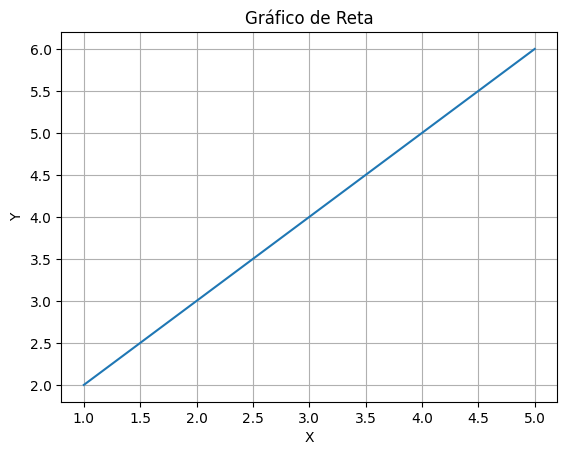

In [64]:
line = PlotStraightLine((1, 2), (5, 6))
line.desenhar_linha()

# Programação Funcional

### 1) Faça um loop para encontrar todos os multiplos de 3 cujo o último algarismo é 1 no intervalo [0,n]. Compare o tempo de execução de um loop convencional com um loop usando compreensão de listas.

In [65]:
# Loop convencional
def encontrar_mult(n):
    multiplos = []
    for i in range(n + 1):
        if i % 3 == 0 and i % 10 == 1:
            multiplos.append(i)
    return multiplos

# Compreensão de listas
def encontrar_mult_lc(n):
    return [i for i in range(n + 1) if i % 3 == 0 and i % 10 == 1]

n = 10000000
mult = encontrar_mult(n)
mult_lc = encontrar_mult_lc(n)
print(mult[:10], len(mult))
print(mult_lc[:10], len(mult_lc))

# Comparando os resultados e tempos de execução
print(timeit.timeit(lambda: encontrar_mult(n), number=1), "segundos\n")
print(timeit.timeit(lambda: encontrar_mult_lc(n), number=1), "segundos\n")

[21, 51, 81, 111, 141, 171, 201, 231, 261, 291] 333333
[21, 51, 81, 111, 141, 171, 201, 231, 261, 291] 333333
0.3344657499692403 segundos

0.32435262500075623 segundos



### 2) Use compreensão de listas para encontrar todos os pares (i,j) tal que i ∈ {1,2,3,4,5} e j ∈ {a,b,c}.

In [66]:
pares = [(i, j) for i in [1,2,3,4,5] for j in ["a", "b", "c"]]
print(pares)

[(1, 'a'), (1, 'b'), (1, 'c'), (2, 'a'), (2, 'b'), (2, 'c'), (3, 'a'), (3, 'b'), (3, 'c'), (4, 'a'), (4, 'b'), (4, 'c'), (5, 'a'), (5, 'b'), (5, 'c')]


### 3) Dado um número real e uma lista com os coeficientes de um polinômio [a0,...,an], use map e reduce para calcular o valor de um polinômio num ponto.

In [67]:
from functools import reduce

def avaliar_poli(x, coefs):
    potencias = range(len(coefs))
    termos = map(lambda potencia, coef: coef * (x ** potencia), potencias, coefs)
    resultado = reduce(lambda a, b: a + b, termos) # equivalente a sum(termos)
    return resultado

# Exemplo de uso
x = 2.5
coeficientes = [2, -1, 3] 

valor_polinomio = avaliar_poli(x, coeficientes)
print("O valor do polinômio em x =", x, "é", valor_polinomio)

O valor do polinômio em x = 2.5 é 18.25


### 4) Crie uma closure para multiplicar números por um número fixo.

In [68]:
def multiplicador_por_numero_fixo(numero_fixo):
    def multiplicar(numero):
        return numero * numero_fixo
    return multiplicar

# Exemplo de uso
multiplicar_por_5 = multiplicador_por_numero_fixo(5)
resultado = multiplicar_por_5(10)
print(resultado)

50


### 5) Escreva um código seguindo os princípios de programação funcional para encontrar todos os primos em um determinado intervalo.

In [69]:
def checar_primo(n):
    if n < 2:
        return False
    # checa se é divisível por algum número entre 2 e raiz(n)
    for i in range(2, math.isqrt(n) + 1): 
        if n % i == 0:
            return False
    return True

def encontrar_primos(start, end):
    primos = filter(checar_primo, range(start, end + 1))
    return list(primos)

primos = encontrar_primos(1, 20)
print(f"Primos no intervalo: {primos}")

Primos no intervalo: [2, 3, 5, 7, 11, 13, 17, 19]
